Import packages needed for Image Analysis

In [84]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

Definition of functions to do Image Analysis

In [85]:
img_train_dir = "Images/pool/training/images/"
img_val_dir = "Images/pool/testing/images/"

In [86]:
def get_img(image_directory):
    fichiers = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]
    img_lst = []
    n=1
    for image in fichiers:
        img_dict = {}
        img_path = os.path.join(image_directory, image)
        img_dict["file_name"] = image
        img_dict["image_normal"] = cv2.imread(img_path)
        img_dict["image_grey"] = get_grey_img(cv2.imread(img_path))
        img_lst.append(img_dict)
    
    return img_lst

def get_grey_img(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def get_dataset_analysis(image_list):
    mean_image = np.zeros((224,224))

    for image_dico in image_list:
        mean_image += image_dico["image_grey"]

    return mean_image / len(image_list)

def cv2_imshow(im, true_color = False):
    if true_color:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off')

def display_n_images(image_list, number):
    for image_dico in random.sample(image_list, number):
        cv2_imshow(im=image_dico["image_normal"], true_color=True)

def create_histograms(channel, channel_name, bin_edges, axes, n, m, color):
    axes[n][m].bar(bin_edges[0:-1], channel, color=color)
    axes[n][m].set_title(f'{channel_name} Channel Histogram')
    axes[n][m].set_xlabel('Pixel Intensity')
    axes[n][m].set_ylabel('Frequency')

def get_histogram_images(image_list):
    # height, width, number_image = len(image_list[0]["image_normal"]), len(image_list[0]["image_normal"][0]), len(image_list)
    height, width, number_image = 224, 224, len(image_list)
    red_channel, blue_channel, green_channel = np.zeros((height,width)), np.zeros((height,width)), np.zeros((height,width))
    hue_channel, sat_channel, value_channel = np.zeros((height,width)), np.zeros((height,width)), np.zeros((height,width))

    for image in image_list:
        img_RGB = cv2.cvtColor(image["image_normal"], cv2.COLOR_BGR2RGB)
        img_HSV = cv2.cvtColor(image["image_normal"], cv2.COLOR_BGR2HSV)

        img_RGB = cv2.resize(img_RGB,(width,height))
        img_HSV = cv2.resize(img_HSV,(width,height))
        
        red_channel += img_RGB[:, :, 0]
        blue_channel += img_RGB[:, :, 1]
        green_channel += img_RGB[:, :, 2]
        hue_channel += img_HSV[:, :, 0]
        sat_channel += img_HSV[:, :, 1]
        value_channel += img_HSV[:, :, 2]
    
    range = 256

    hist_list = []
    # Calculate the histogram of the RGB channel
    histogram_red, bin_edges_red = np.histogram(red_channel.flatten()/number_image, bins=range, range=[0, range])
    hist_list.append(histogram_red)
    histogram_blue, bin_edges_blue = np.histogram(blue_channel.flatten()/number_image, bins=range, range=[0, range])
    hist_list.append(histogram_blue)
    histogram_green, bin_edges_green = np.histogram(green_channel.flatten()/number_image, bins=range, range=[0, range])
    hist_list.append(histogram_green)

    # Calculate the histogram of the HSV channel
    histogram_hue, bin_edges_hue = np.histogram(hue_channel.flatten()/number_image, bins=range, range=[0, range])
    hist_list.append(histogram_hue)
    histogram_sat, bin_edges_sat = np.histogram(sat_channel.flatten()/number_image, bins=range, range=[0, range])
    hist_list.append(histogram_sat)
    histogram_value, bin_edges_value = np.histogram(value_channel.flatten()/number_image, bins=range, range=[0, range])
    hist_list.append(histogram_value)

    # Plot the red histogram
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))

    create_histograms(histogram_red, "Red", bin_edges_red, axes, 0, 0, "Red")
    create_histograms(histogram_blue, "Blue", bin_edges_blue, axes, 1, 0, "Blue")
    create_histograms(histogram_green, "Green", bin_edges_green, axes, 2, 0, "Green")
    create_histograms(histogram_hue, "Hue",bin_edges_hue, axes, 0, 1, "Black")
    create_histograms(histogram_sat, "Saturation", bin_edges_sat, axes, 1, 1, "Black")
    create_histograms(histogram_value, "Value", bin_edges_value, axes, 2, 1, "Black")
    plt.tight_layout()
    plt.show()

    return hist_list

def compare_histogram(hist_list1, hist_list2, bin_edge, color_space_name):
    for hist1, hist2, label in zip(hist_list1, hist_list2, color_space_name):
        plt.bar(bin_edge, hist1, alpha=0.7, color='red', label='new dataset')
        plt.bar(bin_edge, hist2, alpha=0.7, color='blue', label='training dataset')
        plt.title(f'Color Space {label}')
        plt.legend()
        plt.show()


In [87]:
imagelist = get_img(img_train_dir)

Analysis over Training Folder dataset

In [88]:
img_train_list = get_img(img_train_dir)
print('Number of images in this dataset :', len(img_train_list))

Number of images in this dataset : 1993


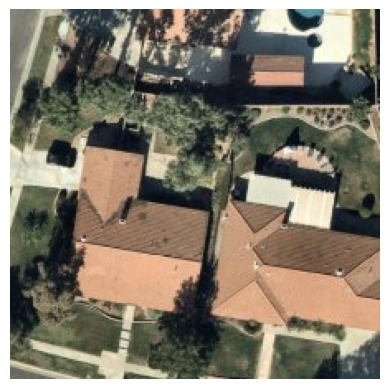

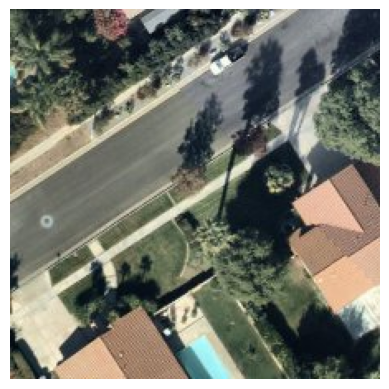

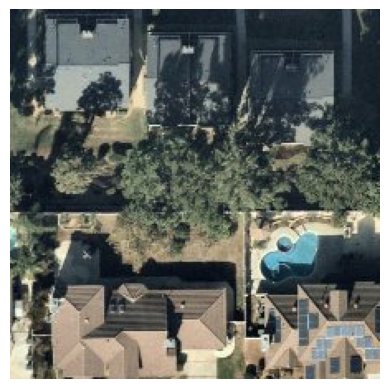

In [89]:
display_n_images(image_list=img_train_list,number=3)

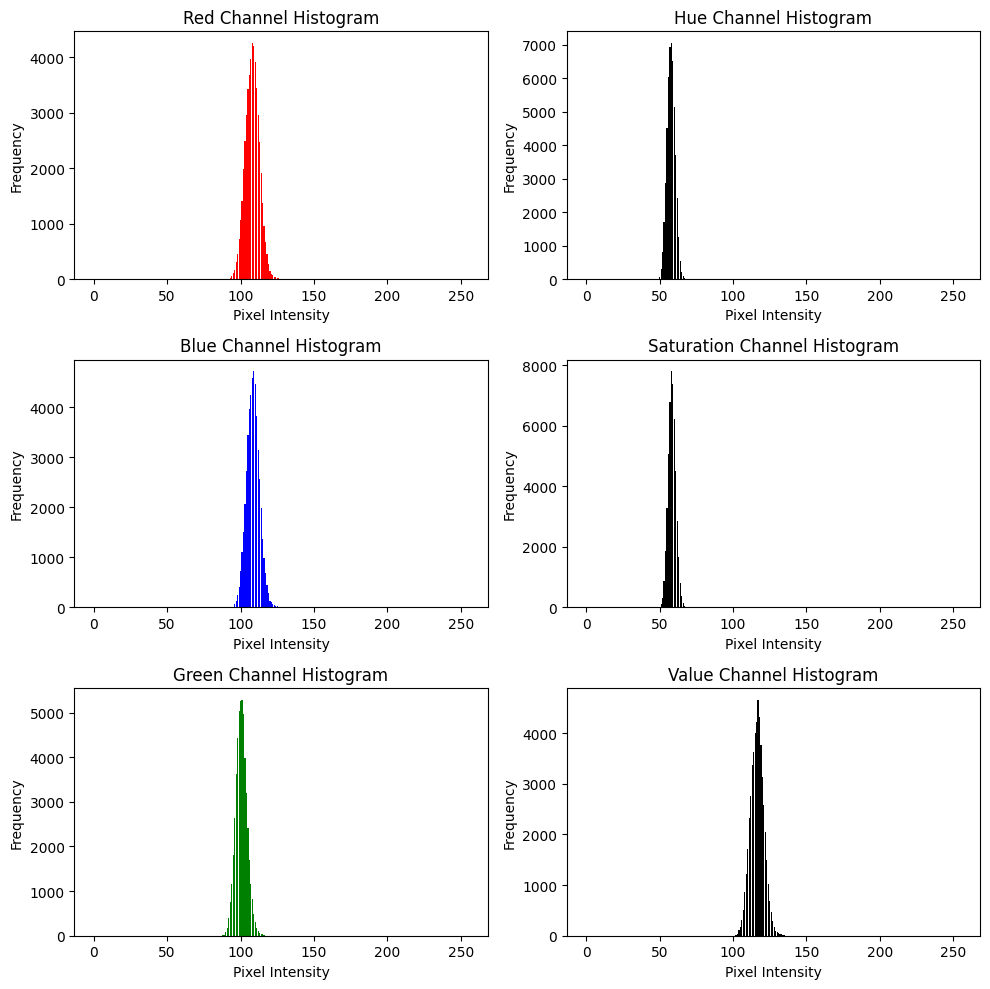

In [90]:
hist_training_dataset = get_histogram_images(image_list=img_train_list[0:203])

Analysis over Testing Folder dataset

In [91]:
img_val_list = get_img(img_val_dir)
print('Number of images in this dataset :', len(img_val_list))

Number of images in this dataset : 2703


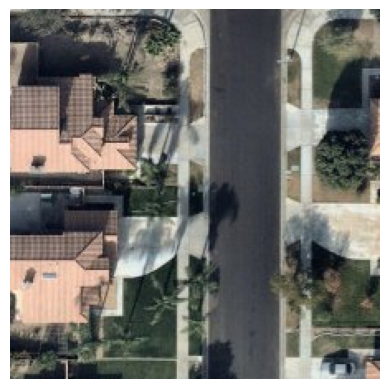

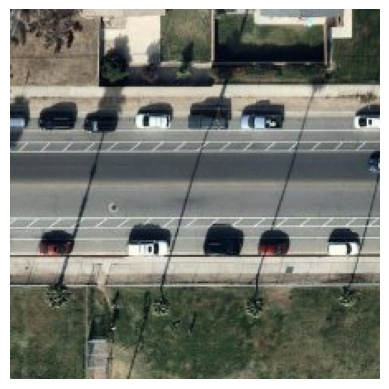

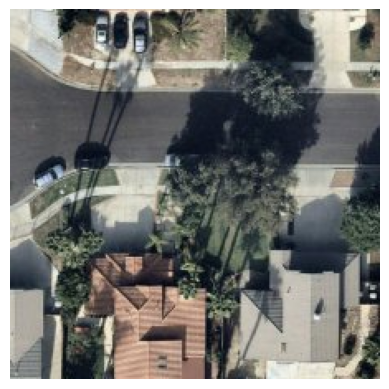

In [92]:
display_n_images(image_list=img_val_list,number=3)

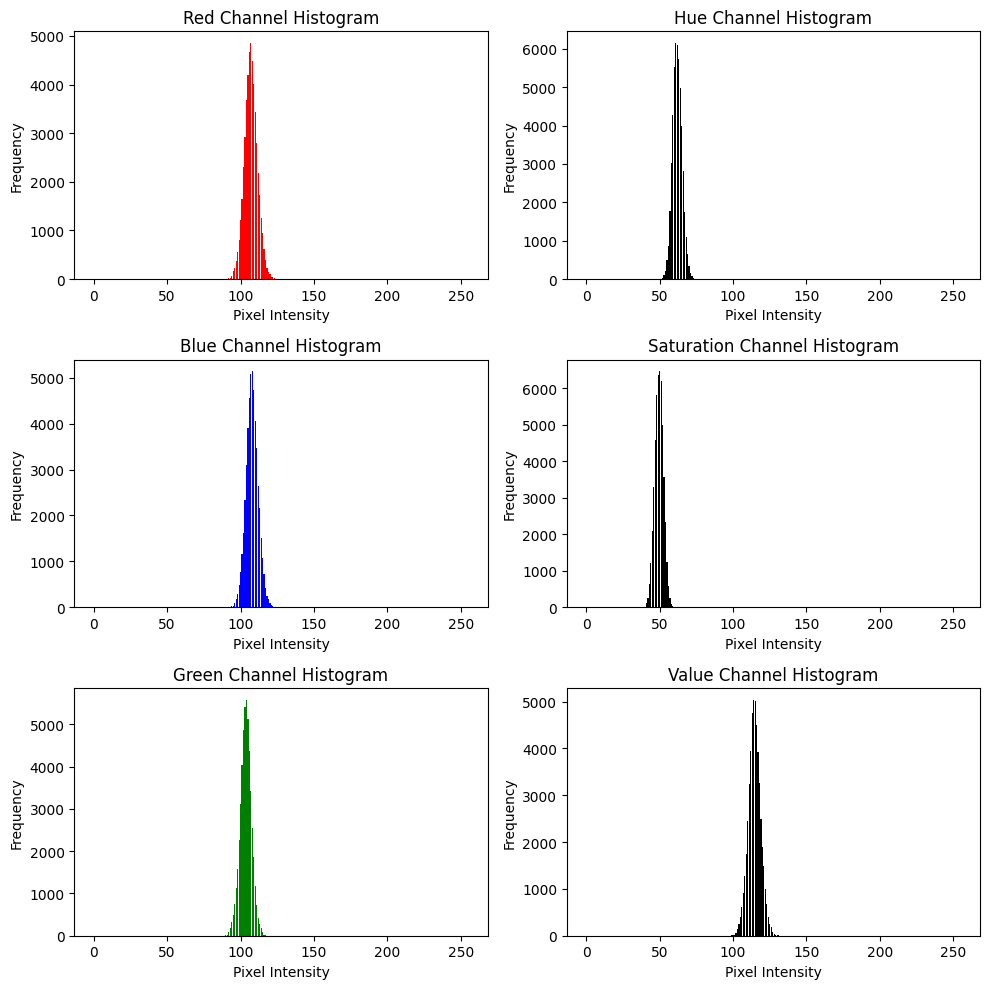

In [93]:
hist_testing_dataset = get_histogram_images(img_val_list[0:209])

Analysis over a complete different Dataset


In [94]:
img_balloon = get_img("Images/balloon/train/")
print('Number of images in this dataset :', len(img_balloon))

FileNotFoundError: [Errno 2] No such file or directory: 'Images/balloon/train/'

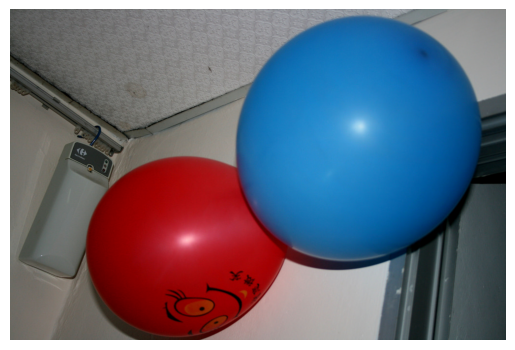

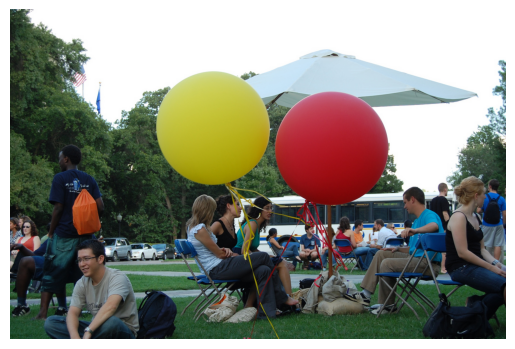

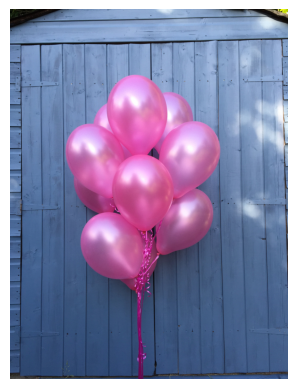

In [ ]:
display_n_images(img_balloon, 3)

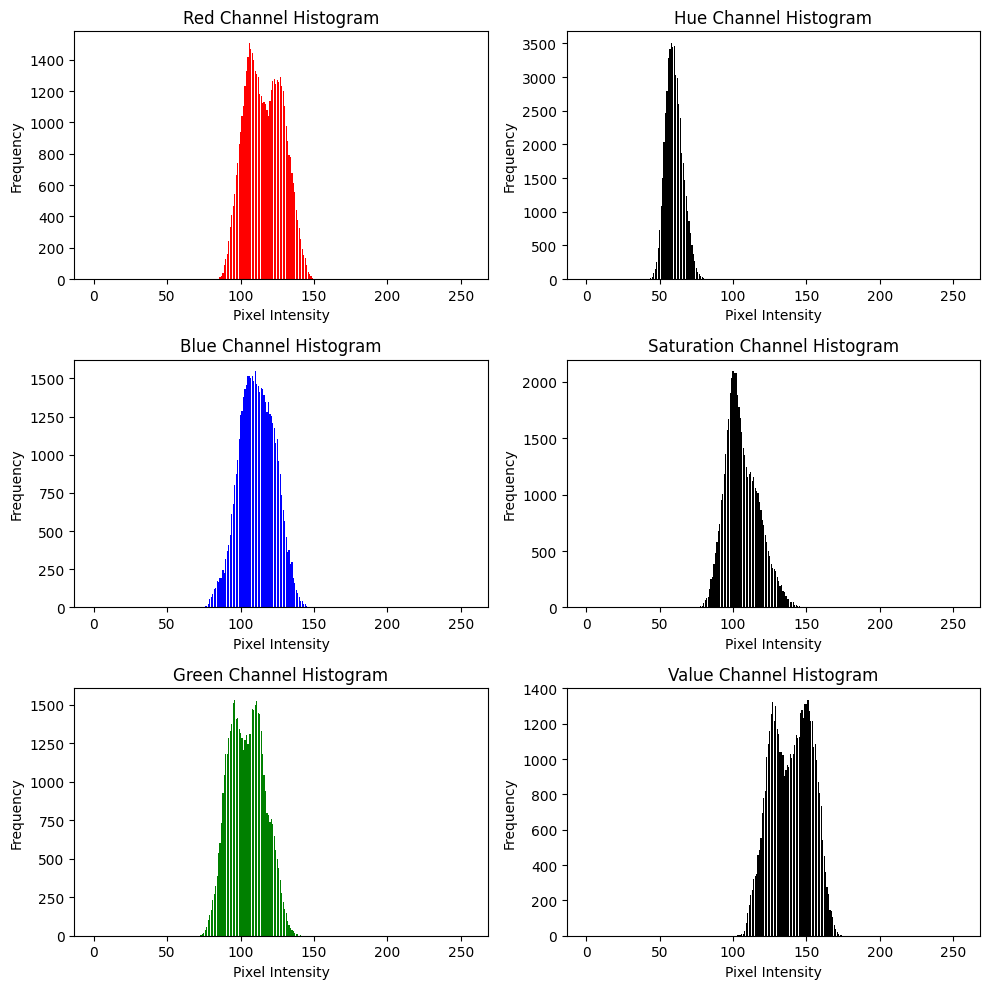

In [ ]:
get_histogram_images(img_balloon)

Analysis over a similar sattelite dataset

In [95]:
img_sat_dir = "Images/pool/testing/image_cropped/"

In [96]:
img_sat_list = get_img(img_sat_dir)

In [97]:
len(img_sat_list)

209

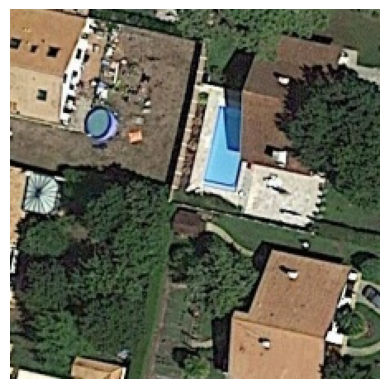

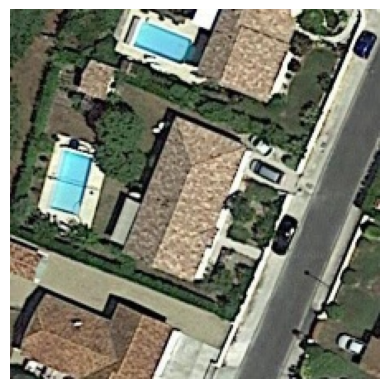

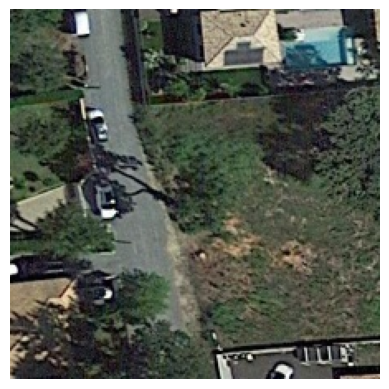

In [98]:
display_n_images(img_sat_list,3)

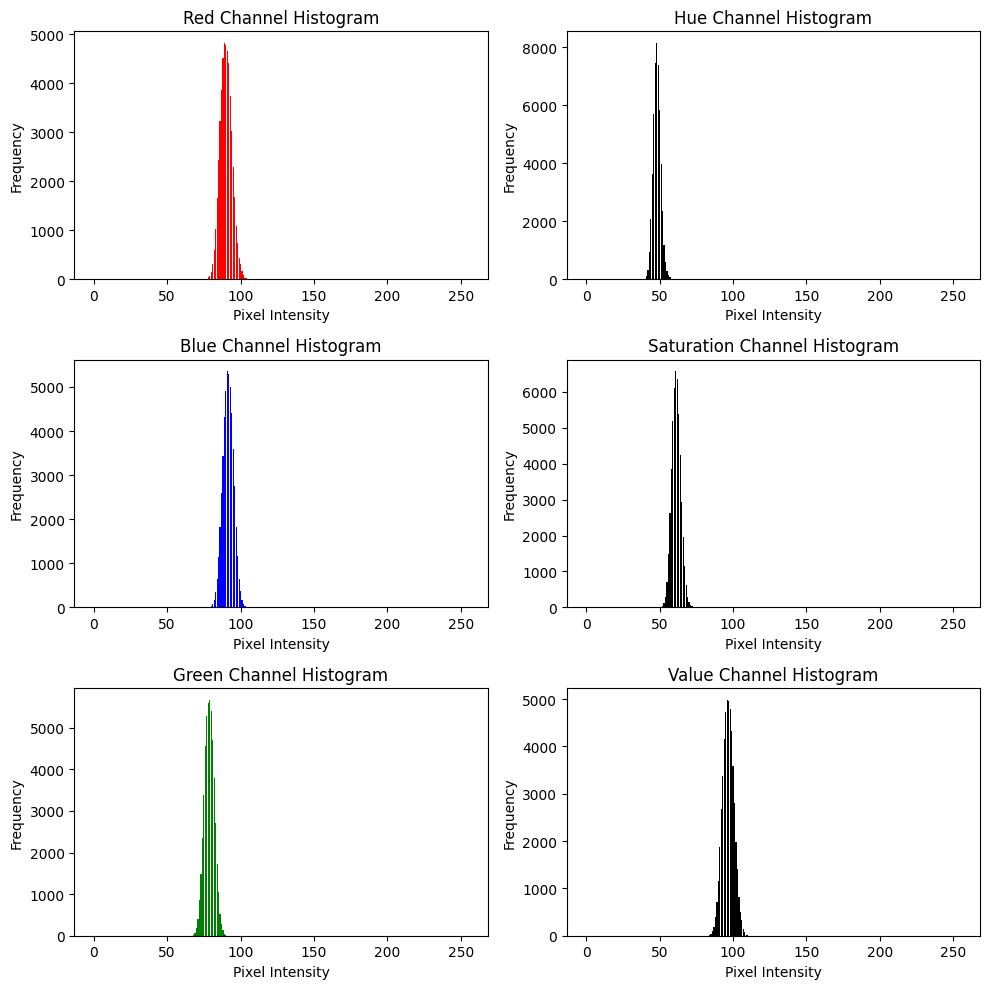

In [99]:
hist_new_dataset = get_histogram_images(img_sat_list)

Comparison of Histograms between original dataset and new data

In [100]:
from scipy.stats import wasserstein_distance
emd_list = []
list_space_color = ["red","blue","green","hue","saturation","value"]
for data1, data2 in zip(hist_testing_dataset, hist_new_dataset):
    emd_list.append(wasserstein_distance(data1, data2))


In [101]:
for color_space, emd_value in zip(list_space_color, emd_list):
    print(f"The EMD value for the space color : {color_space}        is {emd_value}.")


The EMD value for the space color : red        is 18.21875.
The EMD value for the space color : blue        is 22.5625.
The EMD value for the space color : green        is 20.625.
The EMD value for the space color : hue        is 47.140625.
The EMD value for the space color : saturation        is 10.890625.
The EMD value for the space color : value        is 16.3203125.


In [102]:
from scipy.stats import chisquare
chi_square_list = []
for data1, data2 in zip(hist_testing_dataset, hist_training_dataset):
    epsilon = 1e-10
    data1 = data1 + epsilon
    data2 = data2 + epsilon
    chi2, p = chisquare(data1, f_exp=data2)
    print(chi2, "&", p)
    chi_square_list.append(p)

for color_space, chi_value in zip(list_space_color, chi_square_list):
    print(f"The EMD value for the space color : {color_space}        is {chi_value}.")

40000002770.59705 & 0.0
10000001497.47998 & 0.0
200000037890.64297 & 0.0
5675420000471907.0 & 0.0
7.190031600229377e+17 & 0.0
650000009106.367 & 0.0
The EMD value for the space color : red        is 0.0.
The EMD value for the space color : blue        is 0.0.
The EMD value for the space color : green        is 0.0.
The EMD value for the space color : hue        is 0.0.
The EMD value for the space color : saturation        is 0.0.
The EMD value for the space color : value        is 0.0.


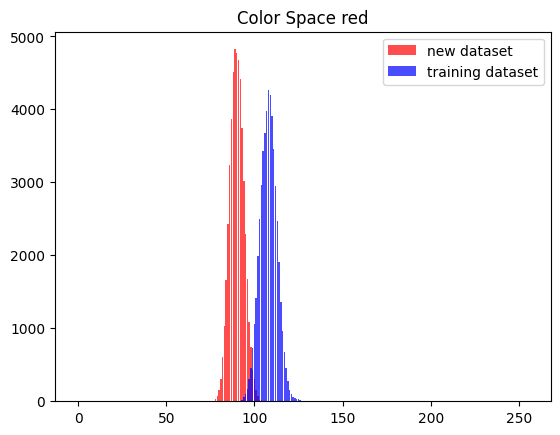

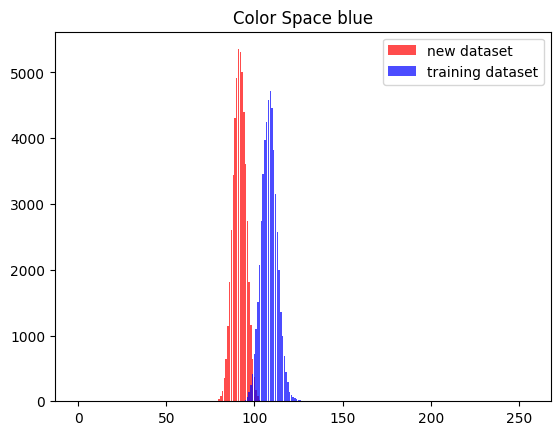

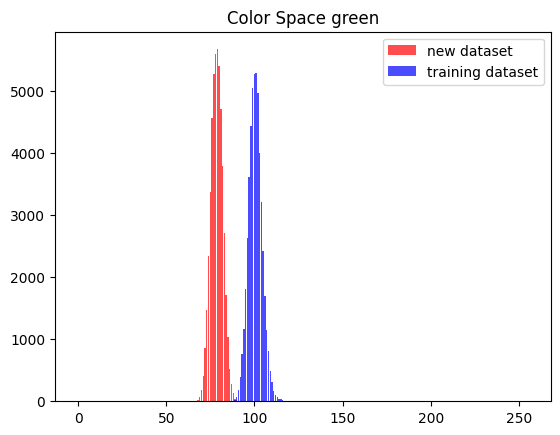

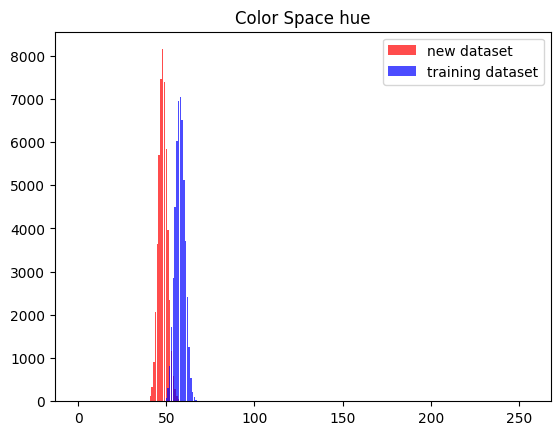

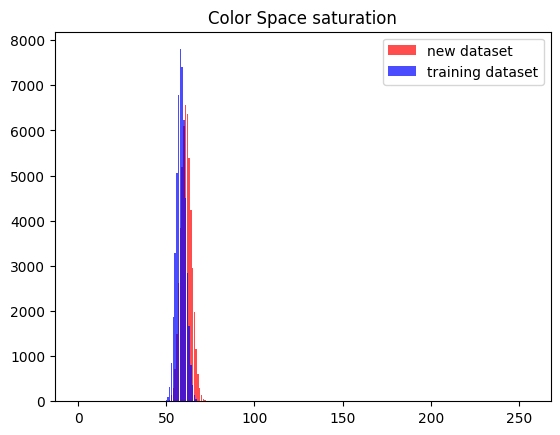

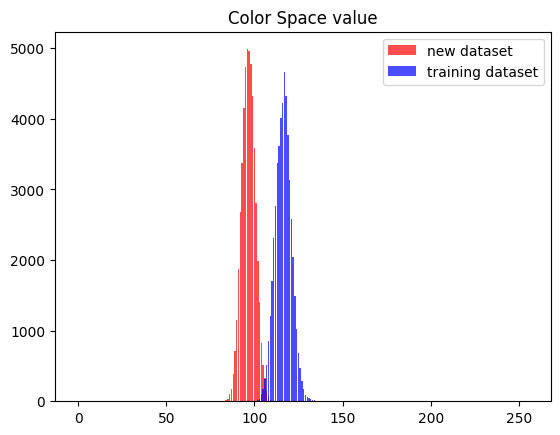

In [103]:
bin_edge = [f for f in range(0,256)]
compare_histogram(hist_new_dataset, hist_training_dataset, bin_edge, list_space_color)

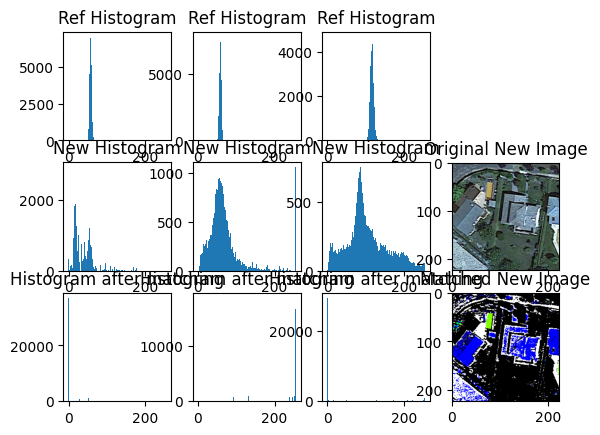

In [104]:
# Load the reference images and 'new' images
reference_images = []
new_images = []  # List of new images

for image_ref, image_new in zip(img_train_list, img_sat_list):
    reference_images.append(image_ref["image_normal"])
    new_images.append(image_new["image_normal"])

# Loop through each new image
for new_image in new_images[0:1]:
    new_hsv = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)
    i = 0
    hsv_match = []
    for space_hist in hist_training_dataset[3:7]:

        cdf_ref = space_hist.cumsum()
        cdf_ref_normalized = cdf_ref / cdf_ref.max()

        # Calculate the histogram of the new image
        hist_new, bins_new = np.histogram(new_hsv[:,:,i].flatten(), 256, [0, 256])

        # Calculate the CDF of the new image
        cdf_new = hist_new.cumsum()
        cdf_new_normalized = cdf_new / cdf_new.max()

        # Match histograms based on CDFs
        matched_hsv = np.interp(new_hsv[:,:,i].flatten(), bins_new[:-1], cdf_ref_normalized)
        plt.subplot(3,4,i+1), plt.bar(bins_new[0:-1], space_hist,width=1), plt.title('Ref Histogram')
        plt.subplot(3,4,i+5), plt.bar(bins_new[0:-1], hist_new,width=1), plt.title('New Histogram')

        # Reshape the equalized data to match the shape of the original 'new' image
        matched_hsv = matched_hsv.reshape(new_hsv[:,:,i].shape) * 255

        hist_after_matching, bins_new = np.histogram(matched_hsv.flatten(), 256, [0, 256])
        plt.subplot(3,4,9+i), plt.bar(bins_new[0:-1], hist_after_matching,width=1), plt.title('Histogram after matching')
        hsv_match.append(matched_hsv)
        i += 1

    new_hsv2 = np.transpose(hsv_match, (1, 2, 0))
    matched_image = cv2.cvtColor(new_hsv2.astype(np.uint8), cv2.COLOR_HSV2BGR)

    # Display the original and matched images
    plt.subplot(348), plt.imshow(new_image), plt.title('Original New Image')
    plt.subplot(3,4,12), plt.imshow(matched_image), plt.title('Matched New Image')
    plt.show()




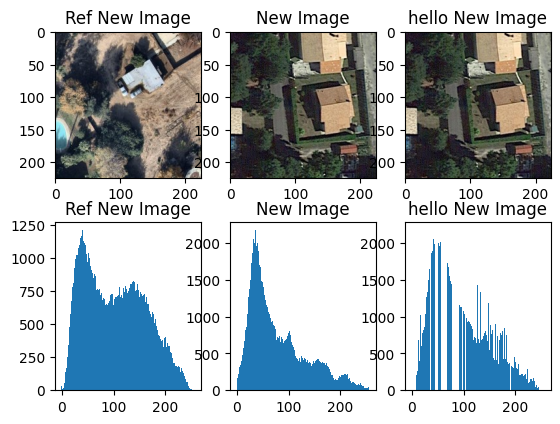

In [105]:
from skimage.exposure import match_histograms

# Load the reference image and 'new' image
reference_image = cv2.imread('Images/pool/training/images/000000030.jpg')
new_image = cv2.imread('Images/pool/testing/image_cropped/img_x0_y3.jpg')

hello = match_histograms(new_image, reference_image).astype('uint8')

# Convert images to HSV color space
reference_hsv = cv2.cvtColor(reference_image, cv2.COLOR_BGR2HSV)
new_hsv = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)

hist_ref = np.histogram(reference_image.flatten(), 256, [0, 256])[0]
hist_new = np.histogram(new_image.flatten(), 256, [0, 256])[0]
hist_mat = np.histogram(hello.flatten(), 256, [0, 256])[0]

# Display the original and CLAHE-adjusted images

plt.subplot(231), plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)), plt.title('Ref New Image')
plt.subplot(232), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)), plt.title('New Image')
plt.subplot(233), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)), plt.title('hello New Image')
plt.subplot(234), plt.bar(bins_new[0:-1], hist_ref, width=1), plt.title('Ref New Image')
plt.subplot(235), plt.bar(bins_new[0:-1], hist_new, width=1), plt.title('New Image')
plt.subplot(236), plt.bar(bins_new[0:-1], hist_mat, width=1), plt.title('hello New Image')
plt.show()


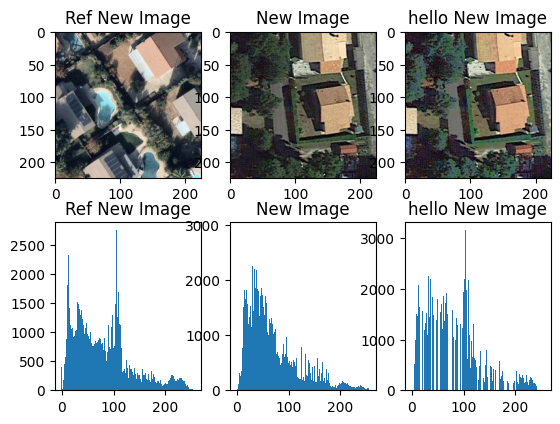

In [106]:
# Load the reference image and 'new' image
reference_image = cv2.imread('Images/pool/training/images/000000020.jpg')
new_image = cv2.imread('Images/pool/testing/image_cropped/img_x0_y3.jpg')

# Convert images to HSV color space
reference_hsv = cv2.cvtColor(reference_image, cv2.COLOR_BGR2HSV)
new_hsv = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)

hello = match_histograms(new_hsv, reference_hsv).astype('uint8')


hist_ref = np.histogram(reference_hsv.flatten(), 256, [0, 256])[0]
hist_new = np.histogram(new_hsv.flatten(), 256, [0, 256])[0]
hist_mat = np.histogram(hello.flatten(), 256, [0, 256])[0]

# Display the original and CLAHE-adjusted images

plt.subplot(231), plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)), plt.title('Ref New Image')
plt.subplot(232), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)), plt.title('New Image')
plt.subplot(233), plt.imshow(cv2.cvtColor(hello, cv2.COLOR_HSV2RGB)), plt.title('hello New Image')
plt.subplot(234), plt.bar(bins_new[0:-1], hist_ref, width=1), plt.title('Ref New Image')
plt.subplot(235), plt.bar(bins_new[0:-1], hist_new, width=1), plt.title('New Image')
plt.subplot(236), plt.bar(bins_new[0:-1], hist_mat, width=1), plt.title('hello New Image')
plt.show()
